# Thermalization

We will measure the thermalization based on the standard deviation of the magnetization (or equivalently the magnetic moment). In the initial random configuration this is a relatively small quantity. But if $J>0$, the sites tend to align in the same direction, therefore configurations with large magnetizations are more probable. This means that the standard deviation should increase. We may expect an increasing function, which converges to some fixed value.

To measure thermalization, we will do sample measurements, and take the standard deviation of these samples at each step. At different temperature and grid size the limit is also different. We are interested in the convergence time, therefore we will normalize the plots in a way that the average of the last 1/4 of iterations is 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from ising_common_procedures import *
from tqdm import trange

plot_colors=['tab:blue','tab:orange','tab:green','tab:red']

# 2D simulations

## Metropolis algorithm

Although the main topic of this notebook is the Wolff algorithm, we still need to compare it with the single site algorithm. Therefore we need to inspect the thermalization behaviour of both algorithms.

### Dependence on temperature

Keep in mind that the critical temperature is $\tilde\beta\approx0.44$.

In [33]:
data_thermalization_beta_metropolis={}
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta_values=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_beta_metropolis[beta]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

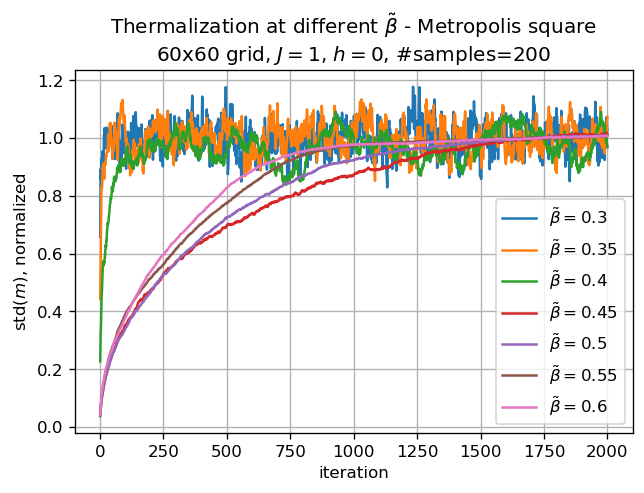

In [40]:
fig_thermalization_beta_metropolis, ax=plt.subplots(1,1,dpi=120)
# constants
for beta,data in data_thermalization_beta_metropolis.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - Metropolis square'+f'\n{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_beta_metropolis.savefig('images/thermalization-beta-dependence-metropolis-square.png')

As we can see, the thermalization is the slowest around the critical temperature. Also, it is slower in the ordered phase.

### Dependence on grid size

We will check the ordered and unordered phases separately.

#### Unordered phase

In [41]:
data_thermalization_n_metropolis_unordered={}
# constants
num_warmup=500
num_meas=200
j=1
beta=0.4
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_metropolis_unordered[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

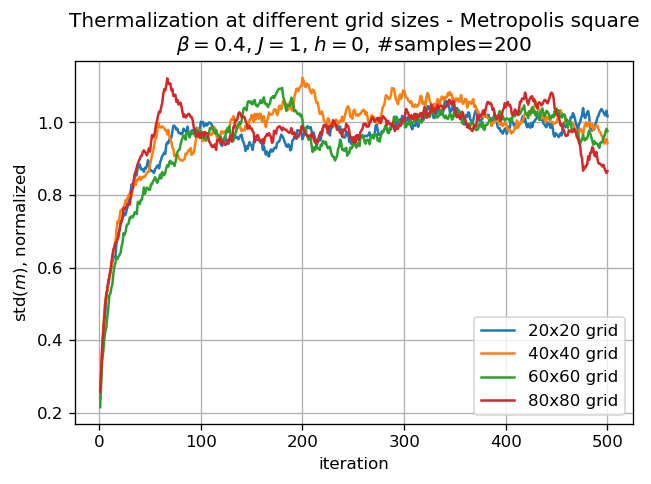

In [48]:
fig_thermalization_n_metropolis_unordered, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_metropolis_unordered.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Metropolis square\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_metropolis_unordered.savefig('images/thermalization-L-dependence-metropolis-unordered.png')

#### Ordered phase

In [43]:
data_thermalization_n_metropolis_ordered={}
# constants
num_warmup=500
num_meas=200
j=1
beta=0.5
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_metropolis_ordered[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

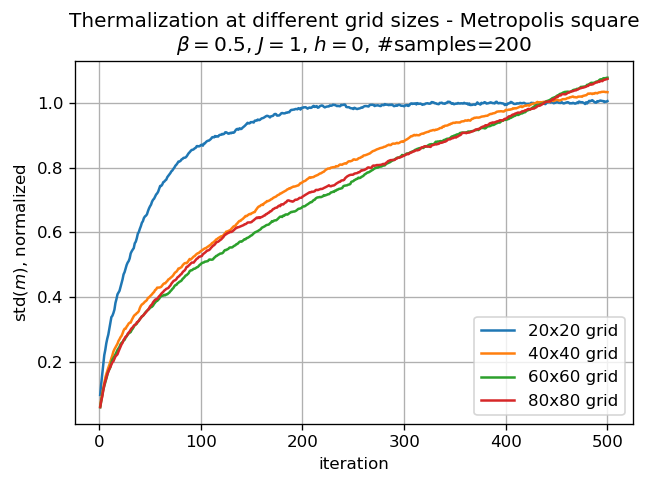

In [45]:
fig_thermalization_n_metropolis_ordered, ax=plt.subplots(1,1, dpi=120)
for n,data in data_thermalization_n_metropolis_ordered.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Metropolis square\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_metropolis_ordered.savefig('images/thermalization-L-dependence-metropolis-ordered.png')

### Summary

As we see, the thermalization time is largest when we are near the critical temperature, and when we have a large grid. Therefore we can give a lower bound for our thermalization time. We are not going to use grids larger than 120x120. Below is the graph for these parameters. Also, we can use the analytical expression for the critical coupling.

In [100]:
data_thermalization_metropolis_extreme=[]
# constants
num_warmup=10000
num_meas=200
j=1
n=120
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for i in trange(num_meas,leave=False):
    arr=init_grid((n,n))
    metropolis_hastings_measurement(arr, beta_c, j, m_result[i,:],e_result[i,:])
m_result_raw=np.std(m_result,axis=0)
data_thermalization_metropolis_extreme=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

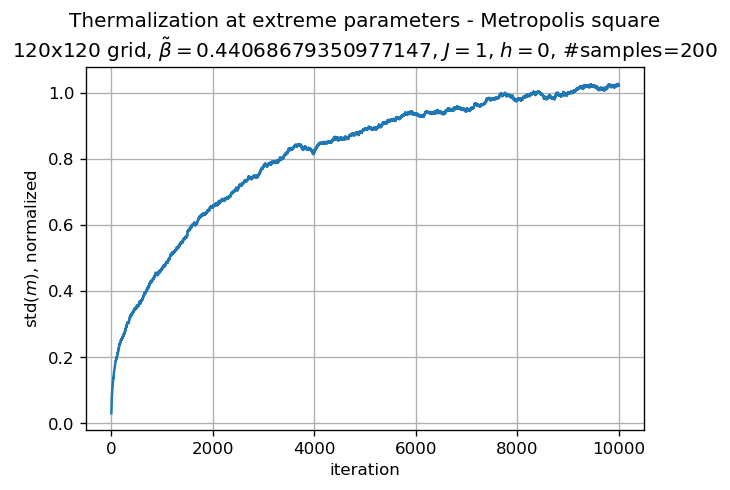

In [102]:
fig_thermalization_metropolis_extreme, ax=plt.subplots(1,1,dpi=120)
ax.plot(range(1,num_warmup+1),data_thermalization_metropolis_extreme,linestyle="-",marker='')
ax.set_title(f'Thermalization at extreme parameters - Metropolis square\n{n}x{n} grid, '+r'$\tilde\beta='+f'{beta_c}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.grid()
fig_thermalization_metropolis_extreme.savefig('images/thermalization-metropolis-extreme.png')

## Wolff algorithm

### Dependence on temperature

In [51]:
data_thermalization_beta_wolff={}
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta_values=[0.6,0.55,0.5,0.45,0.4,0.35,0.3]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_beta_wolff[beta]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

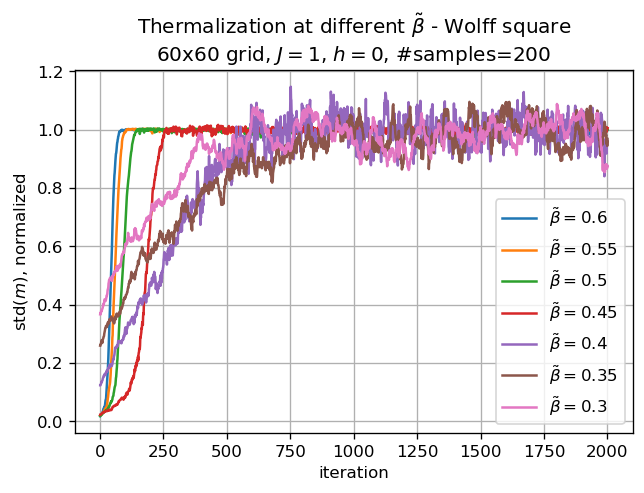

In [54]:
fig_thermalization_beta_wolff, ax=plt.subplots(1,1,dpi=120)
for beta,data in data_thermalization_beta_wolff.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - Wolff square'+f'\n{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_beta_wolff.savefig('images/thermalization-beta-dependence-wolff.png')

### Dependence on grid size

We will check the ordered and unordered phases separately.

#### Unordered phase

In [55]:
data_thermalization_n_wolff_unordered={}
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta=0.4
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_wolff_unordered[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

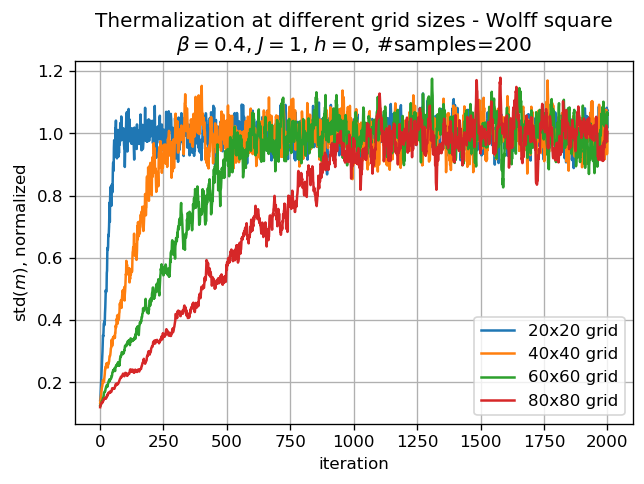

In [59]:
fig_thermalization_n_wolff_unordered, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_wolff_unordered.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff square\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_wolff_unordered.savefig('images/thermalization-L-dependence-wolff-unordered.png')

#### Ordered phase

In [60]:
data_thermalization_n_wolff_ordered={}
# constants
num_warmup=500
num_meas=200
j=1
n=60
beta=0.5
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_wolff_ordered[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

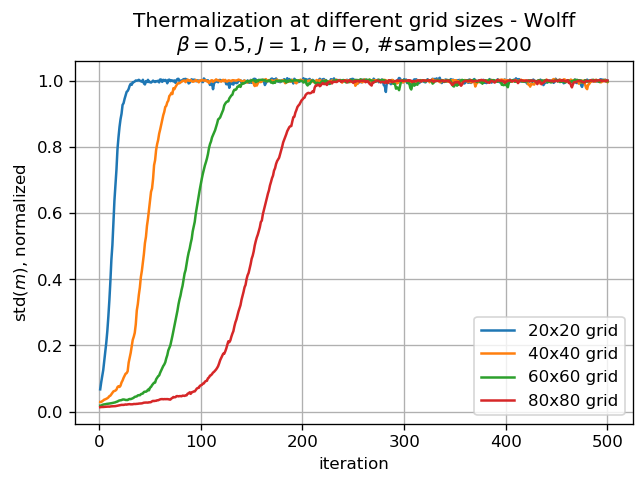

In [79]:
fig_thermalization_n_wolff_ordered, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_wolff_ordered.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_wolff_ordered.savefig('images/thermalization-L-dependence-wolff-ordered.png')

### Summary

As we see, the thermalization time is always greater when the grid size is larger or when $\tilde\beta$ is smaller. Therefore we can give a lower bound for our thermalization time. For this we have to use our largest grid size and smallest beta value.

We are interested in the behavior near the critical temperature, therefore we can set $\tilde\beta\ge3.5$. Also, we are not going to use grids larger than 140x140. Below is the graph for these parameters.

In [97]:
data_thermalization_wolff_extreme=[]
# constants
num_warmup=10000
num_meas=200
j=1
n=140
beta=0.3
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for i in trange(num_meas,desc=f'beta={beta}',leave=False):
    arr=init_grid((n,n))
    wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
m_result_raw=np.std(m_result,axis=0)
data_thermalization_wolff_extreme=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

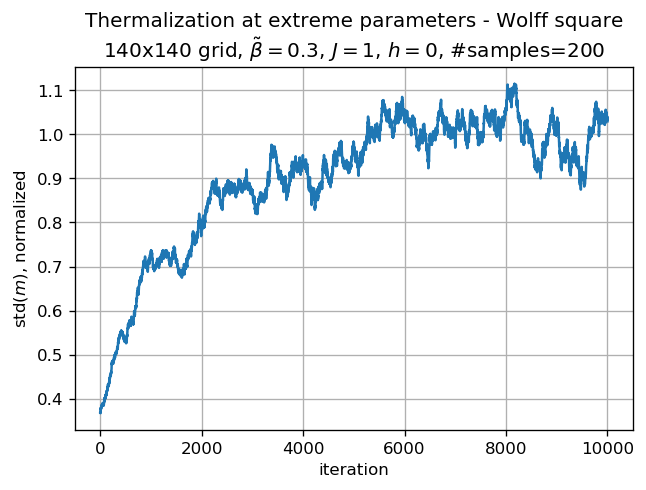

In [99]:
fig_thermalization_wolff_extreme, ax=plt.subplots(1,1,dpi=120)
ax.plot(range(1,num_warmup+1),data_thermalization_wolff_extreme,linestyle="-",marker='')
ax.set_title(f'Thermalization at extreme parameters - Wolff square\n{n}x{n} grid, '+r'$\tilde\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.grid()
fig_thermalization_wolff_extreme.savefig('images/thermalization-wolff-extreme.png')

So 6000 thermalization steps are always sufficient in our parameter range (in the 2D case).

# 3D simulations

## Metropolis algorithm

### Dependence on temperature

Keep in mind that the critical temperature is $\tilde\beta\approx0.222$.

In [62]:
data_thermalization_beta_metropolis_3d={}
# constants
num_warmup=300
num_meas=200
j=1
n=10
beta_values=[0.1,0.15,0.20,beta_c_3d,0.25,0.30]
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_beta_metropolis_3d[beta]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

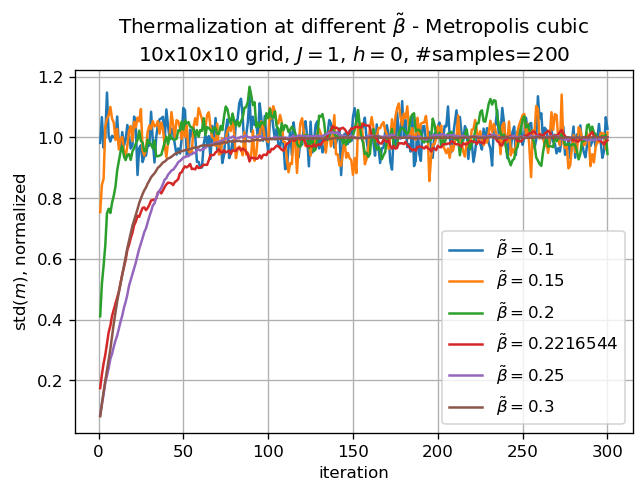

In [76]:
fig_thermalization_beta_metropolis_3d, ax=plt.subplots(1,1,dpi=120)
for beta,data in data_thermalization_beta_metropolis_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - Metropolis cubic'+f'\n{n}x{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_beta_metropolis_3d.savefig('images/thermalization-beta-dependence-metropolis-cubic.png')

### Dependence on grid size

#### Unordered phase

In [66]:
data_thermalization_n_metropolis_unordered_3d={}
# constants
num_warmup=250
num_meas=200
j=1
beta=0.2
n_values=[5,10,15,20]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_metropolis_unordered_3d[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

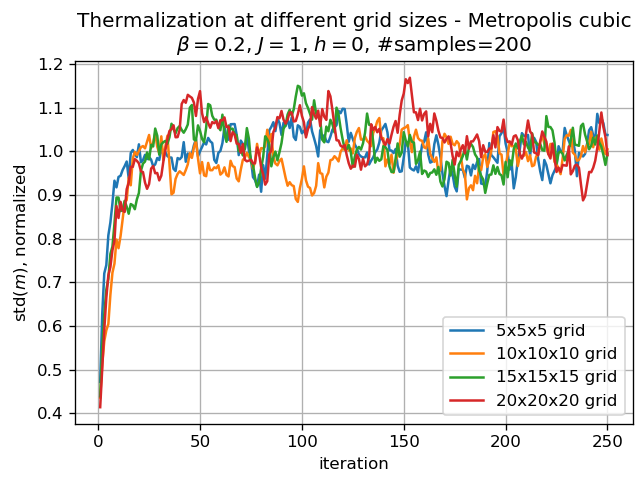

In [75]:
fig_thermalization_n_metropolis_unordered_3d, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_metropolis_unordered_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Metropolis cubic\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_metropolis_unordered_3d.savefig('images/thermalization-L-dependence-metropolis-unordered-cubic.png')

#### Ordered phase

In [70]:
data_thermalization_n_metropolis_ordered_3d={}
# constants
num_warmup=300
num_meas=200
j=1
beta=0.25
n_values=[5,10,15,20]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_metropolis_ordered_3d[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

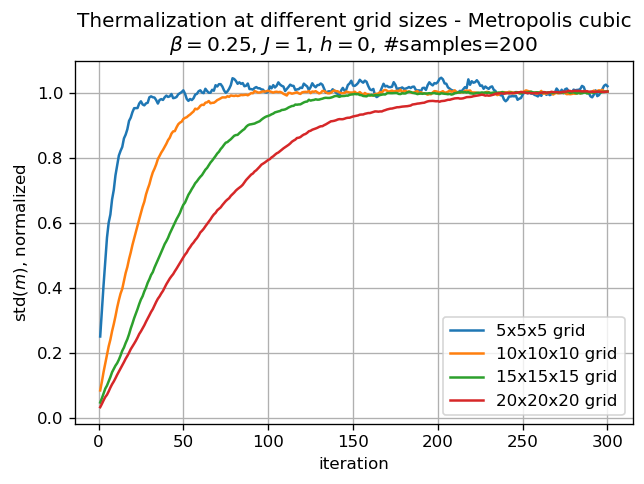

In [74]:
fig_thermalization_n_metropolis_ordered_3d, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_metropolis_ordered_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Metropolis cubic\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_metropolis_ordered_3d.savefig('images/thermalization-L-dependence-metropolis-ordered-cubic.png')

### Summary

We arrive at the same conclusion as in the 2d case: the thermalization time is largest when we are near the critical temperature, and when we have a large grid. We are not going to use grids larger than 20x20. Below is the graph for these parameters.

In [72]:
data_thermalization_metropolis_extreme_3d=[]
# constants
num_warmup=1000
num_meas=200
j=1
n=20
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for i in trange(num_meas,leave=False):
    arr=init_grid((n,n,n))
    metropolis_hastings_measurement(arr, beta_c_3d, j, m_result[i,:],e_result[i,:])
m_result_raw=np.std(m_result,axis=0)
data_thermalization_metropolis_extreme_3d=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

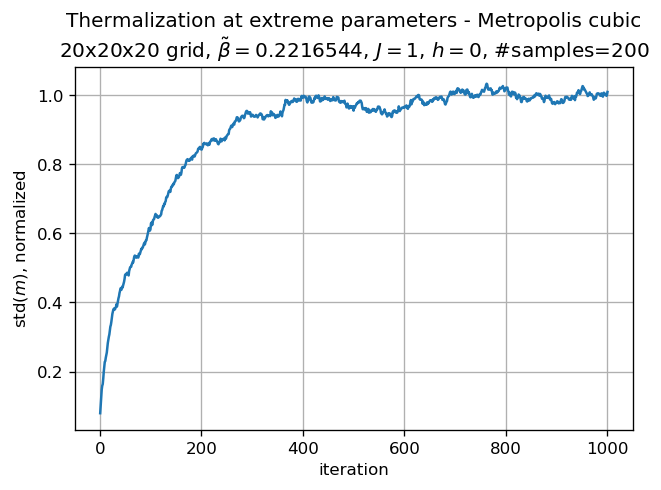

In [78]:
fig_thermalization_metropolis_extreme_3d, ax=plt.subplots(1,1,dpi=120)
ax.plot(range(1,num_warmup+1),data_thermalization_metropolis_extreme_3d,linestyle="-",marker='')
ax.set_title(f'Thermalization at extreme parameters - Metropolis cubic\n{n}x{n}x{n} grid, '+r'$\tilde\beta='+f'{beta_c_3d}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.grid()
fig_thermalization_metropolis_extreme_3d.savefig('images/thermalization-L-dependence-metropolis-extreme-cubic.png')

So 500 iterations are always enough

## Wolff algorithm

### Dependence on temperature

In [80]:
data_thermalization_beta_wolff_3d={}
# constants
num_warmup=1000
num_meas=200
j=1
n=10
beta_values=[0.3,0.25,beta_c_3d,0.20,0.15,0.1]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_beta_wolff_3d[beta]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

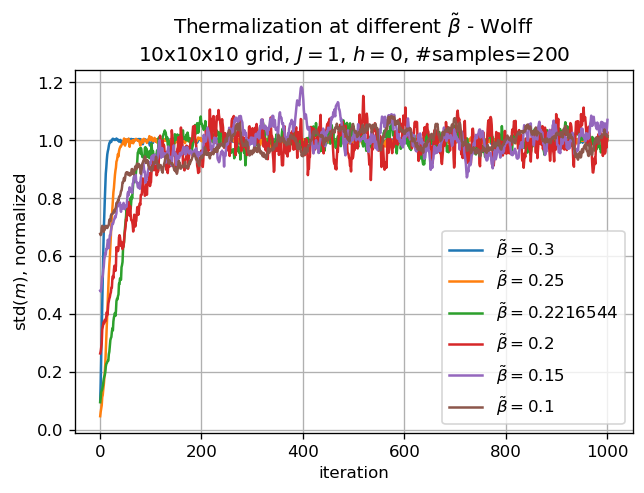

In [82]:
fig_thermalization_beta_wolff_3d, ax=plt.subplots(1,1,dpi=120)
for beta,data in data_thermalization_beta_wolff_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - Wolff'+f'\n{n}x{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_beta_wolff_3d.savefig('images/thermalization-beta-dependence-wolff-cubic.png')

### Dependence on grid size

#### Unordered phase

In [83]:
data_thermalization_n_wolff_unordered_3d={}
# constants
num_warmup=500
num_meas=2000
j=1
n=60
beta=0.2
n_values=[5,10,15,20]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_wolff_unordered_3d[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

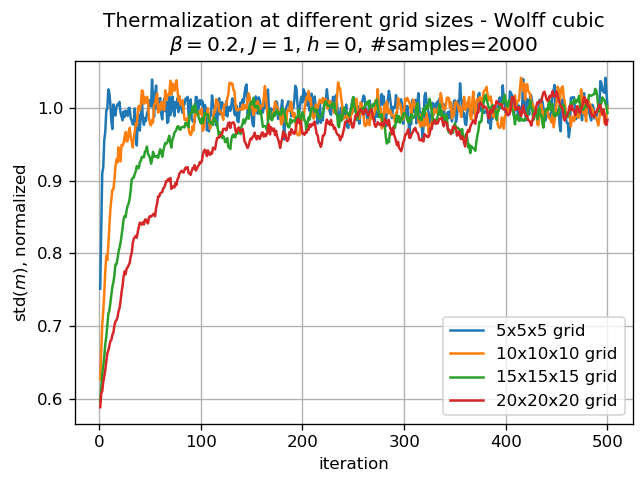

In [84]:
fig_thermalization_n_wolff_unordered_3d, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_wolff_unordered_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff cubic\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_wolff_unordered_3d.savefig('images/thermalization-L-dependence-wolff-unordered-cubic.png')

#### Ordered phase

In [85]:
data_thermalization_n_wolff_ordered_3d={}
# constants
num_warmup=500
num_meas=200
j=1
n=60
beta=0.25
n_values=[5,10,15,20]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    data_thermalization_n_wolff_ordered_3d[n]=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

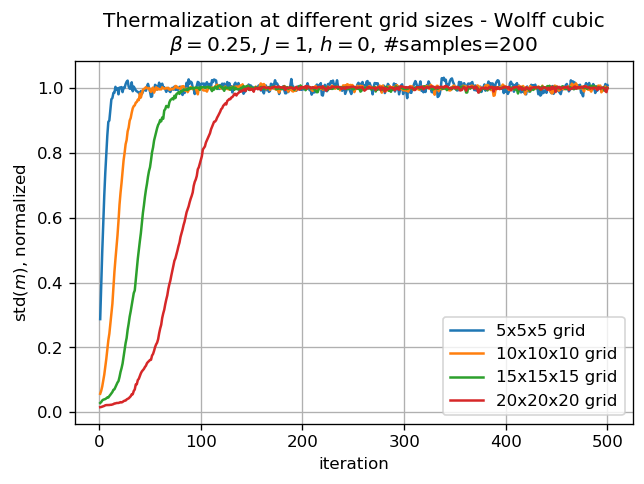

In [94]:
fig_thermalization_n_wolff_ordered_3d, ax=plt.subplots(1,1,dpi=120)
for n,data in data_thermalization_n_wolff_ordered_3d.items():
    ax.plot(range(1,num_warmup+1),data,linestyle="-",marker='',label=f'{n}x{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff cubic\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.legend()
ax.grid()
fig_thermalization_n_wolff_ordered_3d.savefig('images/thermalization-L-dependence-wolff-ordered-cubic.png')

### Summary

We get the same results as in the 2D case: the thermalization time is always greater when the grid size is larger or when $\tilde\beta$ is smaller. Therefore we can give a lower bound for our thermalization time. For this we have to use our largest grid size and smallest beta value.

We are interested in the behavior near the critical temperature, therefore we can set $\tilde\beta\ge2$. Also, we are not going to use grids larger than 25x25. Below is the graph for these parameters.

In [95]:
data_thermalization_wolff_extreme_3d=[]
# constants
num_warmup=5000
num_meas=200
j=1
n=25
beta=0.2
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for i in trange(num_meas,desc=f'beta={beta}',leave=False):
    arr=init_grid((n,n,n))
    wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
m_result_raw=np.std(m_result,axis=0)
data_thermalization_wolff_extreme_3d=m_result_raw/np.average(m_result_raw[num_warmup*3//4:])

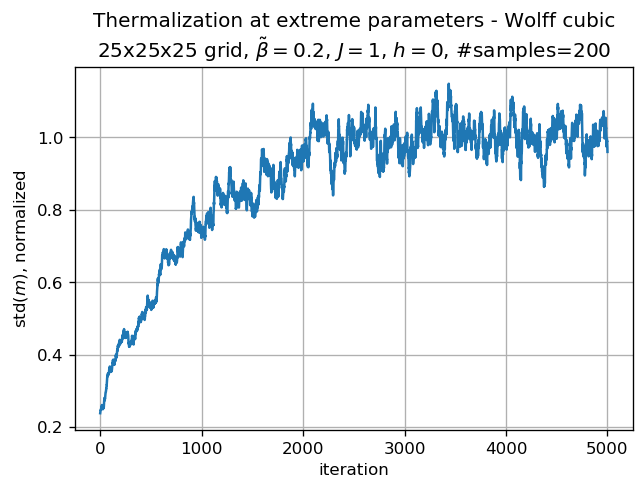

In [96]:
fig_thermalization_wolff_extreme_3d, ax=plt.subplots(1,1,dpi=120)
ax.plot(range(1,num_warmup+1),data_thermalization_wolff_extreme_3d,linestyle="-",marker='')
ax.set_title(f'Thermalization at extreme parameters - Wolff cubic\n{n}x{n}x{n} grid, '+r'$\tilde\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration')
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized')
ax.grid()
fig_thermalization_wolff_extreme_3d.savefig('images/thermalization-wolff-extreme-3d.png')

So in all cases 3000 iterations are enough.